In [1]:
# logistic regression works only when in the dataset
# their is linear behaviour .....

# then what will we do if we have to apply logistic regression ..
# but my data is not in the linear type ....

#   then we will use polynomial logistic regression...
#       suposse we have choosed degree = 2
#          then where  our column shape was of 2 column
# like x1 , x2 ...now it will be trandformed into 6 column
# example :
#             x1 power0 , x1 power 1 , x1 power 2 , x2 power 0 ,
#             x2 power0 ,  x2 power1 , x2 power 2


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
v = pd.read_csv("ushape.csv")

In [8]:
v.head(1)

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0


In [9]:
x = v.iloc[:,0:2].values
y = v.iloc[:,-1].values

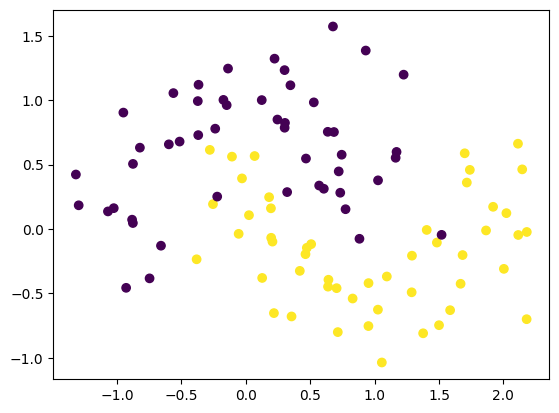

In [10]:
plt.scatter(x[: , 0] , x[: ,1] , c = y)

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


In [13]:
clf.fit(x ,y)

LogisticRegression()

<Axes: >

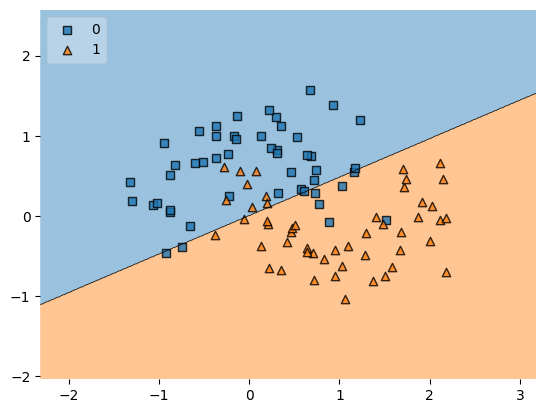

In [20]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=x, y=y.astype(int), clf=clf, legend=2)

#  here we are using normal logistic regression
#  and it tried well but still few datapoints we could see
#  overlapping here ......

In [24]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf ,x , y ,scoring = 'accuracy' , cv = 10)*100)
# still giving the accuracy of 83

np.float64(83.0)

**using polynomial feature**

In [25]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
x_trf = poly.fit_transform(x)

# fitting my dataset in polynomial feature

In [26]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1 ,x_trf , y ,scoring = 'accuracy' , cv = 10)*100)

# now my  accuarcy got increased ...

np.float64(91.0)

In [29]:
def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

  #   our own function ...
  #  have to give degree and figures will keep plotting


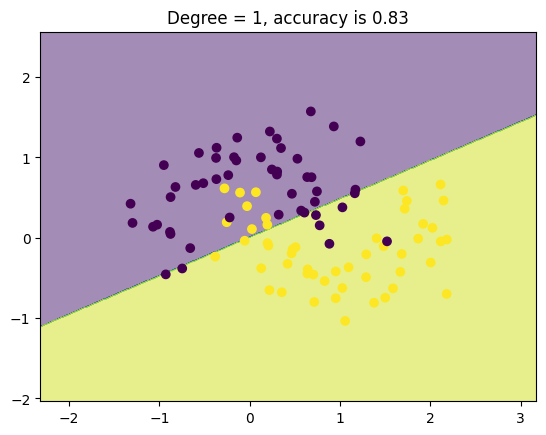

In [31]:

plot_decision_boundary(x,y)

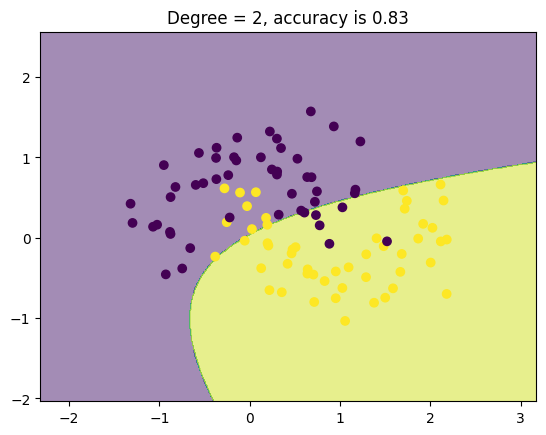

In [32]:
plot_decision_boundary(x ,y , degree = 2)

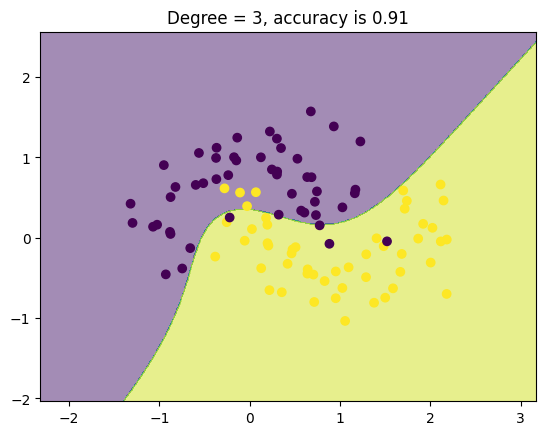

In [33]:
plot_decision_boundary(x ,y , degree = 3)

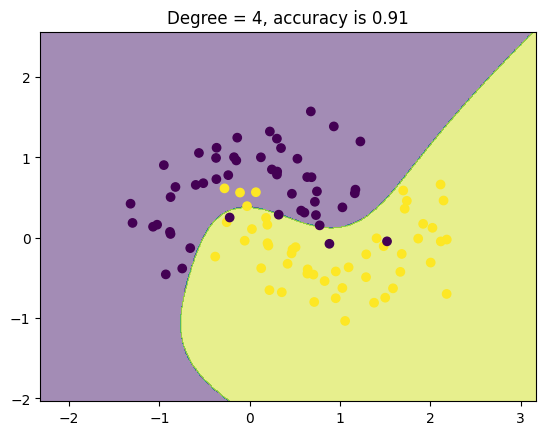

In [34]:
plot_decision_boundary(x ,y , degree = 4)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


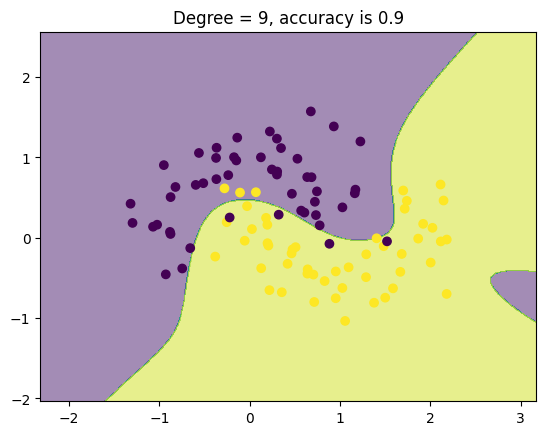

In [35]:
plot_decision_boundary(x ,y , degree = 9)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/

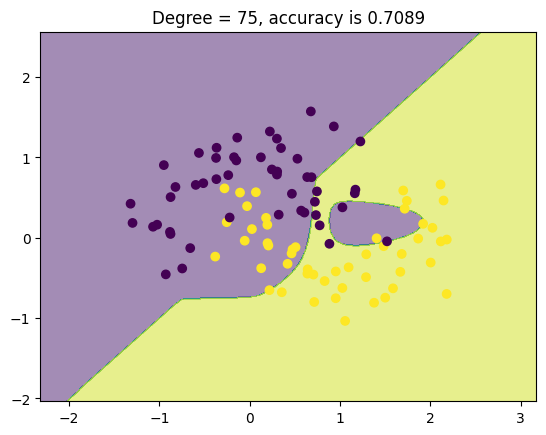

In [38]:
plot_decision_boundary(x ,y , degree = 75)